# Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'ticks', color_codes = True)
import warnings
warnings.filterwarnings('ignore')

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Importing the dataset

In [2]:
data = pd.read_csv(r'C:\Users\lenovo\Desktop\My projects\Datasets\Marketing Campaign\bank-additional-full.csv')

# Preliminary Data-analysis

In [3]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
for column in data.columns:
    if type(data[column][0]) == str:
        print('------------------------------------')
        print(column, pd.value_counts(data[column]))

------------------------------------
job admin.           10173
blue-collar       8800
technician        6531
services          3819
management        2801
retired           1622
entrepreneur      1399
self-employed     1392
housemaid         1018
unemployed         995
student            708
Name: job, dtype: int64
------------------------------------
marital married     23748
single      11026
divorced     4417
unknown        67
Name: marital, dtype: int64
------------------------------------
education university.degree      12123
high.school             9478
basic.9y                6014
professional.course     5231
basic.4y                4124
basic.6y                2270
illiterate                18
Name: education, dtype: int64
------------------------------------
default no         31284
unknown     7971
yes            3
Name: default, dtype: int64
------------------------------------
housing yes        20605
no         17706
unknown      947
Name: housing, dtype: int64
---------

#### General attributes
age - Age of the client (numerical)

job : Type of job (categorical)("admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

marital : Marital status (categorical)("married","divorced","single"; note: "divorced" means divorced or widowed)

education (categorical)("unknown","secondary","primary","tertiary")

default: Has credit in default? (categorical)("yes","no")

balance: Average yearly balance, in euros (numeric) 

housing: Has housing loan? (categorical)("yes","no")

loan: Has personal loan? (categorical)("yes","no")
#### Related with the last contact of the current campaign:
contact: Contact communication type (categorical)("unknown","telephone","cellular") 

day: Last contact day of the month (numeric)

month: Last contact month of year (categorical)("jan", "feb", "mar", ..., "nov", "dec")

duration: Last contact duration, in seconds (numeric)
#### Other attributes:
campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, 999 means client was not previously contacted)

previous: Number of contacts performed before this campaign and for this client (numeric)

poutcome: Outcome of the previous marketing campaign (categorical)("unknown","other","failure","success")
#### Social and economic context attributes
emp.var.rate: employment variation rate - quarterly indicator (numeric)
  
cons.price.idx: consumer price index - monthly indicator (numeric)

cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: number of employees - quarterly indicator (numeric)


# Data visualization Pre-Data-cleansing

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

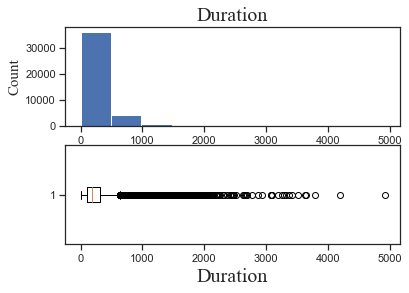

In [7]:
plt.subplot(2,1,1)
plt.hist(data['duration'])
plt.title('Duration', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['duration'], vert = False)
plt.xlabel('Duration', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

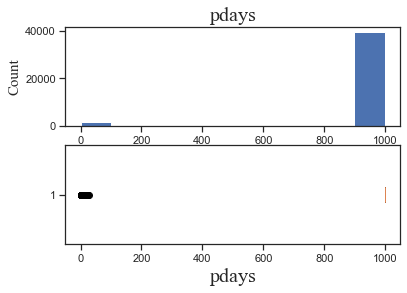

In [8]:
plt.subplot(2,1,1)
plt.hist(data['pdays'])
plt.title('pdays', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['pdays'], vert = False)
plt.xlabel('pdays', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

# Data cleansing

999

In [12]:
data['job'] = data['job'].replace('unknown', np.NaN)
data['education'] = data['education'].replace('unknown', np.NaN)
data['pdays'] = data['pdays'].replace(999, -1)
print(data.shape, 'Null value count', '\n', data.isnull().sum())
data = data.dropna()
print(data.shape, 'Null value count', '\n', data.isnull().sum())

(41188, 21) Null value count 
 age                  0
job                330
marital              0
education         1731
default              0
housing              0
loan                 0
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
(39258, 21) Null value count 
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [16]:
inx = data[(data['duration'] > 3000)].index
print(len(inx))

15


In [ ]:
inx = data[(data['duration'] > 600)].index
print(len(inx))
print(data.shape)
data.drop(inx, inplace = True)
print(data.shape)
data = data.reset_index(drop = True)

In [ ]:
#For Data-analysis in Tableau
data.to_csv(r'C:\Users\lenovo\Desktop\My projects\Datasets\Marketing Campaign\bank-additional-full_cleansed.csv', index = False)

# Data visualization Post-Data-cleansing

In [ ]:
plt.subplot(2,1,1)
plt.hist(data['duration'])
plt.title('Duration', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['duration'], vert = False)
plt.xlabel('Duration', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

In [ ]:
plt.subplot(2,1,1)
plt.hist(data['pdays'])
plt.title('pdays', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.ylabel('Count', fontsize = 15, fontdict = {'fontname' : 'Times New Roman'})

plt.subplot(2,1,2)
plt.boxplot(data['pdays'], vert = False)
plt.xlabel('pdays', fontsize = 20, fontdict = {'fontname' : 'Times New Roman'})
plt.show()

# F-regression

In [ ]:
data = pd.get_dummies(data, drop_first = True)

In [ ]:
features = data.drop(['y_yes'], axis = 1)
outcome = data['y_yes']

In [ ]:
from sklearn.feature_selection import f_regression
f_reg = f_regression(features, outcome)

In [ ]:
reg_summary = pd.DataFrame(data = features.columns.values, columns = ['Features'])
reg_summary['Co-efficient'] = f_reg[0]
reg_summary['p-value'] = f_reg[1].round(3)
reg_summary.sort_values('Co-efficient', ascending = False)

# Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(features, outcome, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data set is ', round(accuracy_score(y_train, dtc.predict(x_train)), 4) * 100, '%')
print('Accuracy score for test data set is ', round(accuracy_score(y_test, dtc.predict(x_test)), 4) * 100, '%')

In [ ]:
pd.DataFrame(confusion_matrix(y_test, dtc.predict(x_test)))

## Hyper-parameter tuning

In [ ]:
from pprint import pprint
print('Paramters that are currently in use:','\n')
pprint(dtc.get_params())

In [ ]:
criterion = ['gini', 'entropy']
presort = [True,False]
splitter = ['best','random']
random_grid = {'criterion' : criterion,
               'presort' : presort,
               'splitter' : splitter}
pprint(random_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
dtc_tuned = RandomizedSearchCV(estimator = dtc, param_distributions = random_grid, \
                              n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
dtc_tuned.fit(x_train, y_train)

In [ ]:
dtc_tuned.best_params_

In [ ]:
print('Accuracy score for train data set is ', round(accuracy_score(y_train, dtc_tuned.predict(x_train)), 4) * 100, '%')
print('Accuracy score for test data set is ', round(accuracy_score(y_test, dtc_tuned.predict(x_test)), 4) * 100, '%')

In [ ]:
pd.DataFrame(confusion_matrix(y_test, dtc_tuned.predict(x_test)))

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train, y_train)

In [ ]:
print('Accuracy score for train data set is ', round(accuracy_score(y_train, rfc.predict(x_train)), 4) * 100, '%')
print('Accuracy score for test data set is ', round(accuracy_score(y_test, rfc.predict(x_test)), 4) * 100, '%')

In [ ]:
pd.DataFrame(confusion_matrix(y_test, rfc.predict(x_test)))

## Hyper-parameter tuning

In [ ]:
from pprint import pprint 
print("Paremters that are currently in use for Random-Forest-Classifier","\n")
pprint(rfc.get_params())

In [ ]:
bootstrap = [True, False]
criterion = ['entropy', 'gini']
n_estimators = [i for i in range(10, 501, 10)]
max_features = ['auto','sqrt','log2']
warm_start = [True, False]
random_grid = {'bootstrap' : bootstrap,
               'criterion' : criterion,
               'n_estimators' : n_estimators, 
               'max_features' : max_features,
               'warm_start' : warm_start}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfc_tuned = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid, \
                              n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1')
rfc_tuned.fit(x_train, y_train)

In [ ]:
rfc_tuned.best_params_

In [ ]:
print('Accuracy score for train data set is ', round(accuracy_score(y_train, rfc_tuned.predict(x_train)), 4) * 100, '%')
print('Accuracy score for test data set is ', round(accuracy_score(y_test, rfc_tuned.predict(x_test)), 4) * 100, '%')

In [ ]:
pd.DataFrame(confusion_matrix(y_test, rfc_tuned.predict(x_test)))

# Naives Bayes theorem

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

In [ ]:
print('Accuracy score for train data set is ', round(accuracy_score(y_train, gnb.predict(x_train)), 4) * 100, '%')
print('Accuracy score for test data set is ', round(accuracy_score(y_test, gnb.predict(x_test)), 4) * 100, '%')

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
pd.DataFrame(confusion_matrix(y_test, gnb.predict(x_test)))